In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import matplotlib.pylab as plt
%matplotlib inline

from scipy import special

from scipy import stats

/var/folders/2p/d_nj_y2s0p32_2p156bn343c0000gn/T/ipykernel_66990/2212971281.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Ex 1:  Swain vs. Alabama ##

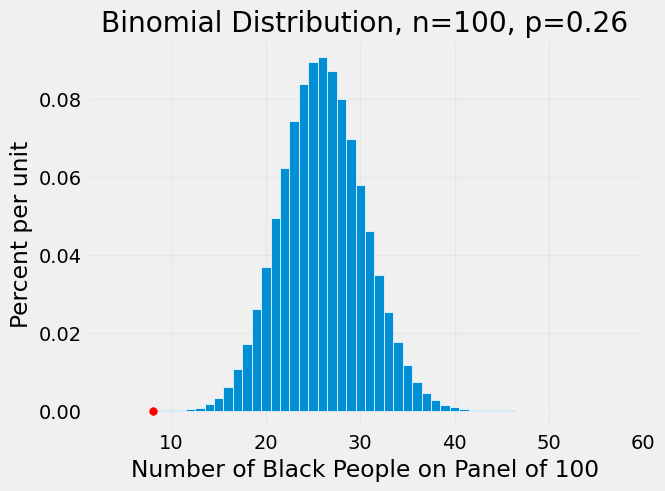

In [2]:
# Create a plot of Binomial Distribution:

k = np.arange(101)
p = special.comb(100, k)*(0.26**k)*(0.74**(100-k))

fig, ax = plt.subplots()

ax.bar(k, p, width=1, ec='white');
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.xlim(1,60)
plt.title("Binomial Distribution, n=100, p=0.26");
plt.xlabel("Number of Black People on Panel of 100")
plt.ylabel("Percent per unit")
plt.scatter(8, -.0001, color="red", s=30)


In [3]:
#Hypothesis Test:  
# Null:  p=0.26
# Alternative  p<0.26


# (1) Calculate the p-value: probability of region beyond observed value
p[0:9].sum()


# (2) See if this is less than 1% (or your pre-chosen significance level)

4.734794997889318e-06

**Conclusion:**

In [4]:
#Conclusion:  since p<0.01, we reject the null hypothesis at the 1% significance level

In [5]:
from scipy import stats
stats.binom.cdf(8, 100, 0.26)

4.73479499788932e-06

## Option 2: Simulate Test Statistic Distribution

In [6]:


def test_statistic_swain(n=100):
    return np.random.binomial(n=100, p=0.26)
    #print("Number chosen out of 100)
    

test_statistic_swain()

29

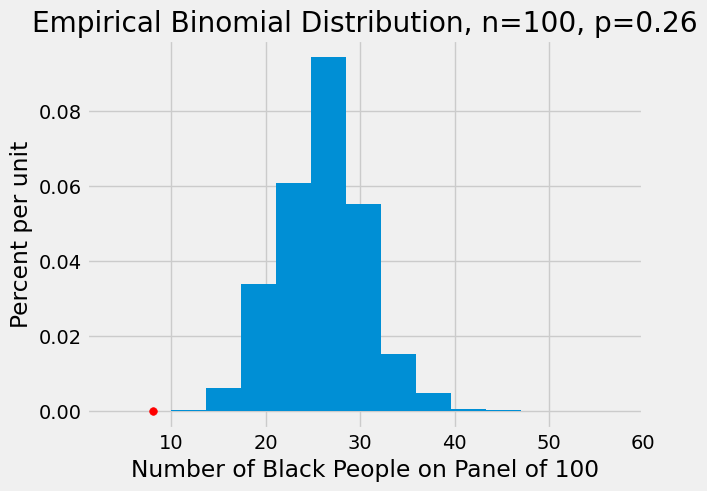

In [7]:
# Simulate 10,000 copies of the test statistic
num_simulations = 10000;

outcomes=np.array([test_statistic_swain(100) for i in range(num_simulations)])


plt.hist(outcomes, density=True);

#ax.set_axisbelow(True)
#ax.grid(alpha=0.25)
plt.xlim(1,60)
plt.title("Empirical Binomial Distribution, n=100, p=0.26");
plt.xlabel("Number of Black People on Panel of 100")
plt.ylabel("Percent per unit")
plt.scatter(8, -.0001, color="red", s=30)



# Calculating Empirical P-Value

In [8]:
# Calculate empirical p-value:  Number of simulated test statistics less than or equal to observed test statistic
sum(outcomes<=8)/num_simulations

# (2) See if this is less than 1% (or our initially chosen significance level)

0.0

### Conclusion:    
Reject the null and accept the alternative that the panel composition was biased against Black people.  This conclusion is highly statistically signficant (because our p-value <0.01)

## Ex 2: Alameda County Jury Panels ##

In [9]:
eth =['Asian', 'Black', 'Latino', 'White', 'Other']

jury = pd.DataFrame(
    {       
        'Eligible': [0.15, 0.18, 0.12, 0.54, 0.01],
         'Panels': [0.26, 0.08, 0.08, 0.54, 0.04]
        
    }, index = eth
)

jury

,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


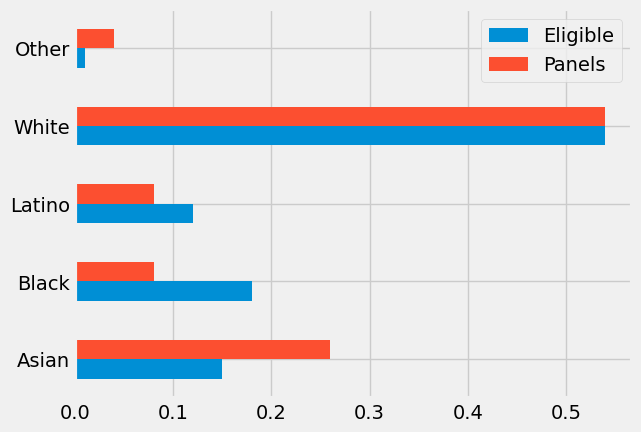

In [10]:
jury.plot.barh();

In [11]:
#Make an array with the eligible proportions assumed under the null hypothesis

null_hyp=np.array([0.15, 0.18, 0.12, 0.54, 0.01])

In [12]:
# Simulate a draw of size N assuming the null hypothesis:


N=1423  #from the ACLU report
simulated = np.random.multinomial(N, null_hyp)

simulated_proportions = simulated/N

print(simulated)
print(simulated_proportions)

[209 252 166 779  17]
[0.1468728  0.17709065 0.11665495 0.547435   0.01194659]


        Eligible  Panels  Simulated
Asian       0.15    0.26   0.146873
Black       0.18    0.08   0.177091
Latino      0.12    0.08   0.116655
White       0.54    0.54   0.547435
Other       0.01    0.04   0.011947


<Axes: >

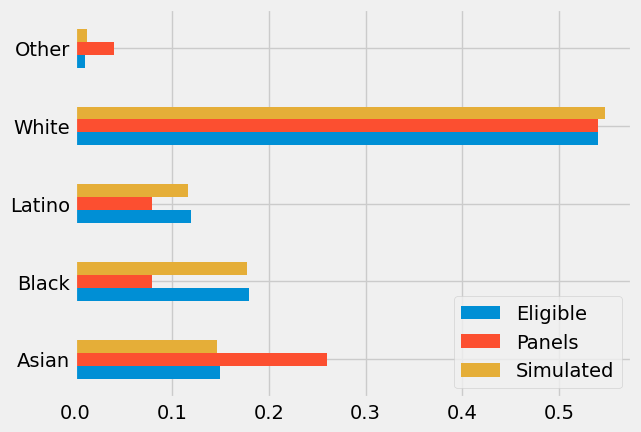

In [13]:
# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_simulated=jury.copy()
jury_with_simulated["Simulated"]=simulated_proportions

print(jury_with_simulated)

jury_with_simulated.plot.barh()

## Distance Between Distributions

In [14]:

# In this case, we need to understand how each of the 5 categories
# differ from their expected values according to the model

jury_with_difference=jury.copy()
jury_with_difference["Difference"]=jury["Panels"]-jury["Eligible"]
jury_with_difference

,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.10
Latino,0.12,0.08,-0.04
White,0.54,0.54,0.00
Other,0.01,0.04,0.03


## Total Variation Distance

In [15]:
# This was the statistic we chose
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [16]:
np.mean(jury['Panels']-null_hyp)/2

2.7755575615628915e-18

In [17]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true 
obsvd_tvd = tvd(jury['Panels'],null_hyp)
obsvd_tvd

0.14

In [18]:
# The TVD of a model simluation from its expected values
tvd(np.random.multinomial(N, null_hyp)/N, null_hyp)

0.009908643710470864

Text(0, 0.5, 'Percent per unit')

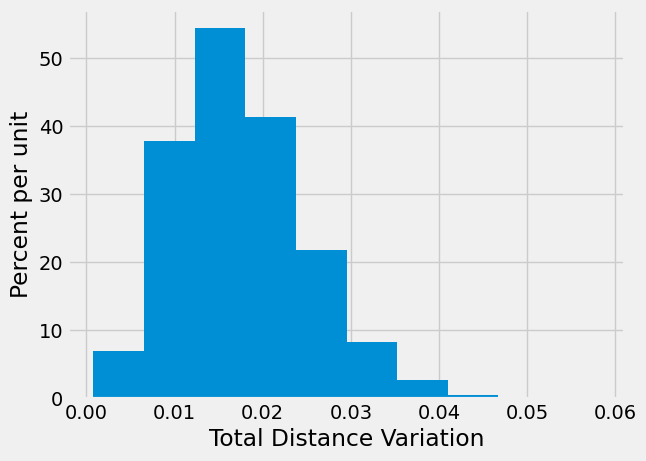

In [19]:
def simulated_tvd():
    return tvd(np.random.multinomial(N, null_hyp)/N, null_hyp)


num_simulations = 50000

tvds = np.array([simulated_tvd() for i in range(num_simulations)])


plt.hist(tvds, density=True);  
plt.xlabel("Total Distance Variation")
plt.ylabel("Percent per unit")
    

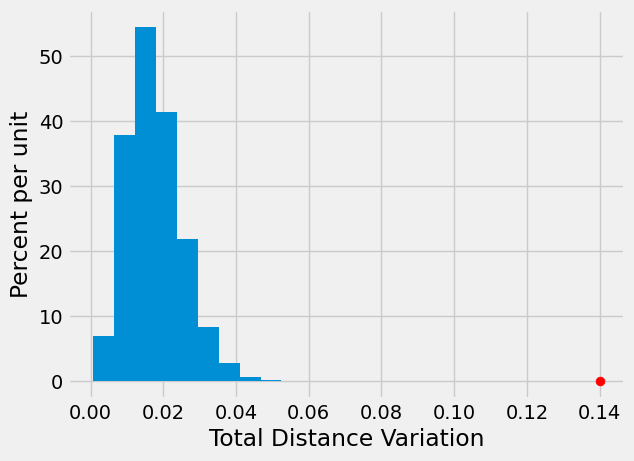

In [20]:
# Add the observed test statistic to the plot:
plt.hist(tvds, density=True);  
plt.xlabel("Total Distance Variation")
plt.ylabel("Percent per unit")

    
plt.scatter(obsvd_tvd, -.001, color="red", s=40)




In [21]:

# (1) Calculate the empirical p-value: simulation area beyond observed value

sum(tvds>=obsvd_tvd)/N

# (2) See if this is less than 1% (or our initially chosen significance level)

0.0

**Conclusion**:
Our empiricial p-value is $0$ (note that the actual theoretical p-value isn't 0, but since our simulations showed 0 observations out of $10000$ that had a TVD greater than or equal to 0.14, we know that the theoretical p-value is at least less than $1/10000$.

Given that our empirical p-value is less than our significance cutoff of $0.01$ we **REJECT THE NULL** hypothesis.      It is important for us to be precise about what we can conclude from our analysis:

**We can conclude that the distribution provided for the panelists who reported for service does not look like a random sample from the estimated distribution in the eligible population.**

Our analysis supports the ACLU’s conclusion that the panels were not representative of the distribution provided for the eligible jurors.

As with most such analyses, ours doesn’t say why the distributions are different.   See here for a more detailed discussion about this case:  https://inferentialthinking.com/chapters/11/2/Multiple_Categories.html

## Ex 3: Mendel and Pea Flowers ##

Mendel's null: 75% chance of purple flowers

Observed data:  grew 929 plants, of which 709 had purple flowers


In [29]:
#Simulate one value of the test statistic under the null hypothesis:  75% chance of purple flowers out of sample of 929

predicted_proportions = np.array([.75, .25])

def test_statistic_purple_flowers(n=929):
    num_purple=sum(np.random.choice(["W","P"],size=n,p=[.25, .75]) =="P")
    #print("Number of purple flowers out of 929:",num_purple)
    return abs(num_purple/n*100-75)

test_statistic_purple_flowers()

0.026910656620017903

Text(0, 0.5, 'Percent per unit')

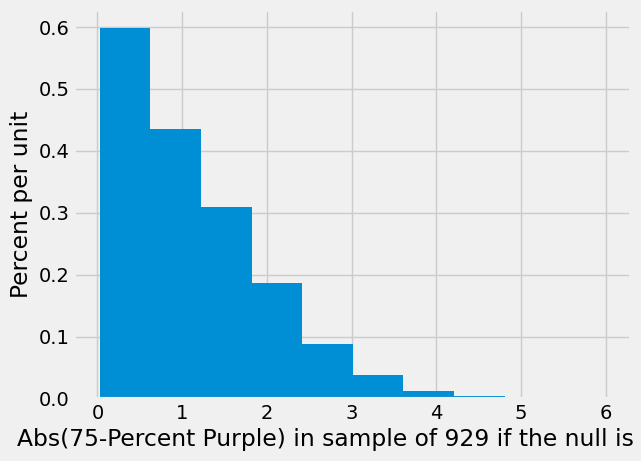

In [30]:
# Simulate 10,000 copies of the test statistic
num_simulations = 10000;

outcomes=[]

for i in np.arange(num_simulations):
    outcomes = np.append(outcomes, test_statistic_purple_flowers(929))

plt.hist(outcomes, density=True);

#ax.set_axisbelow(True)
#ax.grid(alpha=0.25)
plt.xlabel("Abs(75-Percent Purple) in sample of 929 if the null is true")
plt.ylabel("Percent per unit")



## Our Decision

In [31]:
#Compare to observed test statistic:
## Mendel had 929 plants, of which 709 had purple flowers

observed_purples = 709 / 929*100

observed_test_statistic=abs(observed_purples-75)
observed_test_statistic


1.318622174381062

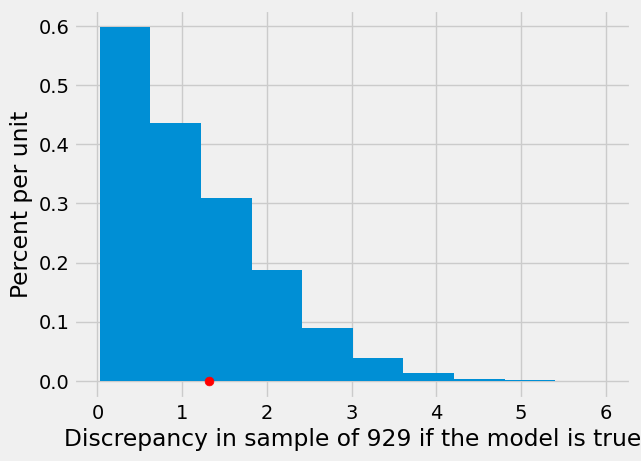

In [32]:
#Plot

plt.hist(outcomes, density=True);
#ax.set_axisbelow(True)
#ax.grid(alpha=0.25)
plt.xlabel("Discrepancy in sample of 929 if the model is true")
plt.ylabel("Percent per unit")

plt.scatter(observed_test_statistic, -.0001, color="red", s=40)

In [33]:
# (1) Calculate the EMPIRICAL p-value: simulation area beyond observed value

sum(outcomes>=observed_test_statistic)/ num_simulations

# (2) See if this is less than 5% (or our initially chosen significance level)


0.3633

## Conclusion:  
Since 0.3655> 0.05, we **FAIL TO REJECT** the null hypothesis that the proportion of purple flowers is 0.75.  The evidence is not inconsistent with our null hypothesis.  This does NOT prove that our null is true.  It just proves that we don't have evidence to reject it, so we will continue using the null hypothesis.


## Ex 4: The TA's Defense ##

In [40]:
scores = pd.read_csv('scores_by_section.csv')
scores

,Section,Midterm
0,1,22
1,2,12
2,2,23
3,2,14
4,1,20
...,...,...
354,5,24
355,2,16
356,2,17
357,12,16


In [33]:
scores.groupby("Section").count()

,Midterm
Section,
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30


In [32]:
scores.groupby("Section").mean()

,Midterm
Section,
1,15.593750
2,15.125000
3,13.666667
4,14.766667
5,17.454545
6,15.031250
7,16.625000
8,16.310345
9,14.566667


In [39]:
observed_average = 13.6667 

In [ ]:
scores["Midterm"].mean()

In [33]:
random_sample=scores.sample(27,replace=False)
random_sample["Midterm"].mean()

13.814814814814815

In [6]:
random_sample['Midterm'].mean()

17.703703703703702

In [41]:
# Simulate one value of the test statistic 
# under the hypothesis that the section is like a random sample from the class

def random_sample_midterm_avg():
    random_sample = scores.sample(27, replace=False)
    return random_sample['Midterm'].mean()

In [14]:
# Simulate 100,000 copies of the test statistic


num_sim=100000

sample_averages = np.array([random_sample_midterm_avg() for i in range(num_sim)])




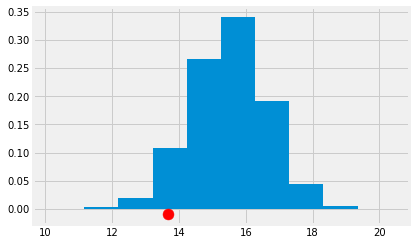

In [41]:
# Compare the simulated distribution of the statistic
# and the actual observed statistic

plt.hist(sample_averages, density=True);

plots.scatter(observed_average, -0.01, color='red', s=120);

## Calculating p-value

In [42]:
# (1) Calculate the p-value: simulation area beyond observed value
np.count_nonzero(sample_averages <= observed_average) / num_sim
# (2) See if this is less than .01%

0.05666

## Conclusion:  
Since 0.05746> 0.01, we **FAIL TO REJECT** the null hypothesis that any difference in scores for section 3 was just due to random chance

## Theoretical Calculation:

We could have done this without using simulations thanks to the Central Limit Theorem!   

By the CLT, $$\bar{X}_{27} \sim N(\mu, \sigma^2/27)$$ where $\mu = $ pop mean = `scores["Midterm"].mean()`   and                    

$\sigma = $ pop_std = `pop_std=scores["Midterm"].std(ddof=0)`


Thus 

p-value =   $P(\bar{X}_{27}<=13.667)$ = `stats.norm.cdf(13.667,pop_mean, pop_std/np.sqrt(27))`


In [15]:
pop_mean=scores["Midterm"].mean()

In [16]:
pop_std=scores["Midterm"].std(ddof=0)

In [20]:
stats.norm.cdf(13.667,pop_mean, pop_std/np.sqrt(27))

0.059094075271088536

Again, since $p= 0.059> 0.01$, we **FAIL TO REJECT** the null hypothesis that any difference in scores for section 3 was just due to random chance